In [56]:
options(repr.plot.width=5, repr.plot.height=4)

In [57]:
data <- get(load("Daten.RData"))

In [3]:
str(data)

'data.frame':	100 obs. of  11 variables:
 $ PatientenNr      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Therapie         : int  3 3 1 2 1 3 2 1 2 2 ...
 $ Geschlecht       : chr  "w" "m" "m" "m" ...
 $ Alter            : num  51 47 21 53 65 52 NA 31 53 17 ...
 $ Groesse          : num  179 165 169 174 181 190 171 190 154 177 ...
 $ Gewicht1         : num  78 76 75 81 80 79 77 105 81 78 ...
 $ Blutdruck        : num  195 105 110 95 125 140 115 125 135 125 ...
 $ Raucherstatus    : chr  "ja" "ja" "nein" "." ...
 $ Gewicht2         : num  74 66 68 76 82 89 71 89 55 67 ...
 $ Zeit             : int  65 123 165 111 115 192 100 136 174 96 ...
 $ Ereignisindikator: num  1 0 0 1 1 0 0 0 1 1 ...


### Remove NaN's

In [4]:
data$Raucherstatus[data$Raucherstatus=="."]<-NA

In [5]:
data <- na.omit(data) 

### a) Mode, median and arithmectic mean

In [7]:
head(data,10)

PatientenNr Therapie Geschlecht Alter Groesse Gewicht1 Blutdruck
1   1          3        w          51    179      78      195      
2   2          3        m          47    165      76      105      
3   3          1        m          21    169      75      110      
5   5          1        m          65    181      80      125      
6   6          3        m          52    190      79      140      
8   8          1        m          31    190     105      125      
9   9          2        m          53    154      81      135      
10 10          2        m          17    177      78      125      
11 11          3        m          51    182      80      110      
12 12          3        m          14    150      45      105      
   Raucherstatus Gewicht2 Zeit Ereignisindikator
1  ja            74        65  1                
2  ja            66       123  0                
3  nein          68       165  0                
5  nein          82       115  1                
6  ja            89       192  0                
8  nein          89       136  0                
9  nein          55       174  1                
10 nein          67        96  1                
11 ja            80       151  0                
12 ja            58       140  1

In [8]:
attach(data)

In [46]:
#formula to calculae mode
calculate_mode <- function(x) {
     ux <- unique(x)   #returns a vector, data frame or array like x but with duplicate elements/rows removed
     mode <- ux[which.max(tabulate(match(x, ux)))]
     anzahl <- max(table(x))
     list(anzahl=anzahl,mode=mode)
 }

### Geschlecht

In [47]:
table(data$Geschlecht)


 m  w 
55 37 

In [48]:
calculate_mode(Geschlecht)

$anzahl
[1] 55

$mode
[1] "m"

### Groesse

In [49]:
mean(Groesse)
median(Groesse)
calculate_mode(Groesse)

[1] 170.4239

[1] 172

$anzahl
[1] 6

$mode
[1] 177

### Alter

In [50]:
mean(Alter)
median(Alter)
calculate_mode(Alter)

[1] 36.77174

[1] 34

$anzahl
[1] 7

$mode
[1] 51

### Therapie

In [51]:
mean(Therapie)
median(Therapie)
calculate_mode(Therapie)

[1] 2.032609

[1] 2

$anzahl
[1] 33

$mode
[1] 3

### b) Histogram and ranking value

In [53]:
range(Alter)

[1]  8 74

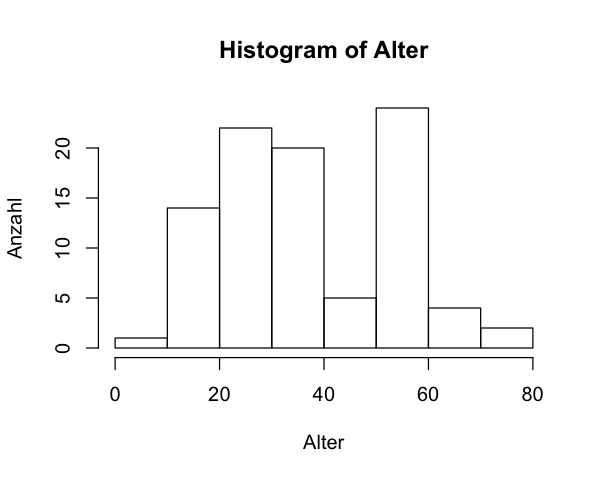

In [85]:
hist(Alter,seq(0,80,by=10),xlab="Alter",ylab="Anzahl")

In [86]:
#rank: values sorted by size and numbered
rank(Alter,na.last = TRUE)

[1] 66.0 62.0 18.0 88.0 71.5 39.5 76.0  8.0 66.0  3.5 71.5 42.5 71.5 18.0 31.5
[16] 35.0  2.0 36.5 39.5 24.5 24.5 28.5  8.0 71.5 18.0 28.5  1.0 86.0 31.5 21.5
[31] 51.5 14.5 76.0 59.5 92.0 76.0 42.5 51.5 21.5  8.0 14.5 33.5 12.5 84.5 39.5
[46] 24.5 56.5 56.5 12.5 87.0 33.5 39.5  8.0 90.0 46.0 18.0 83.0 24.5 51.5 36.5
[61] 11.0 49.0  3.5  5.0 89.0 80.0 66.0 18.0 91.0 54.5 46.0 66.0 58.0 80.0 82.0
[76] 76.0 59.5 54.5 76.0 28.5 80.0 66.0 46.0 46.0 46.0 61.0 84.5 66.0  8.0 28.5
[91] 51.5 66.0

In [87]:
table(rank(Alter))


   1    2  3.5    5    8   11 12.5 14.5   18 21.5 24.5 28.5 31.5 33.5   35 36.5 
   1    1    2    1    5    1    2    2    5    2    4    4    2    2    1    2 
39.5 42.5   46   49 51.5 54.5 56.5   58 59.5   61   62   66 71.5   76   80   82 
   4    2    5    1    4    2    2    1    2    1    1    7    4    5    3    1 
  83 84.5   86   87   88   89   90   91   92 
   1    2    1    1    1    1    1    1    1 

### c) Quantile

In [88]:
quantile(Alter, probs = seq(0, 1, 0.25))

0%   25%   50%   75%  100% 
 8.00 23.00 34.00 51.25 74.00

In [89]:
quantile(Groesse, probs = seq(0, 1, 0.25))

0%    25%    50%    75%   100% 
122.00 161.00 172.00 178.25 200.00

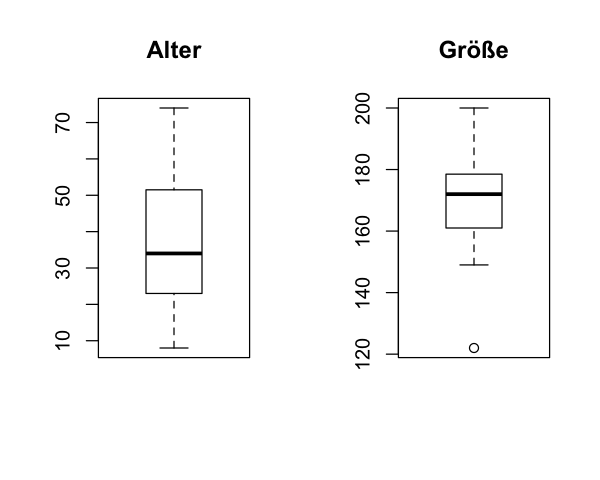

In [91]:
par(mfrow=c(1,2))
boxplot(Alter,main="Alter")
boxplot(Groesse,main="Größe")
#solid line = median ; dots = statistical outliers